<a href="https://colab.research.google.com/github/tomunizua/summativeassignment-mlop/blob/main/ml_pipeline_summativenotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Name: Banana Guard



In [5]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
from PIL import Image
import tensorflow as tf
import itertools
import pickle
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load


from src.preprocessing import preprocess_and_encode
from src.prediction import load_model, make_predictions


## This part of the notebook
was extracted from the previous summative notebook. It contains the data pre processing and creation of the model (second_model.keras) that is used in every other part of this notebook.

In [ ]:
# --- Modularized Data Loading and Dataset Creation ---

def load_data(train_csv, valid_csv, test_csv):
    """Loads data from CSV files and returns Pandas DataFrames."""
    train_df = pd.read_csv(train_csv)
    valid_df = pd.read_csv(valid_csv)
    test_df = pd.read_csv(test_csv)
    return train_df, valid_df, test_df

def encode_labels(train_df, valid_df, test_df):
    """Performs label encoding, fitting only on the training data."""
    le = LabelEncoder()
    train_df['class_encoded'] = le.fit_transform(train_df['class'])
    valid_df['class_encoded'] = le.transform(valid_df['class'])
    test_df['class_encoded'] = le.transform(test_df['class'])
    return le, train_df, valid_df, test_df

def load_image(image_path):
    """Loads and resizes an image."""
    image_string = tf.io.read_file(image_path)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image_resized = tf.image.resize(image_decoded, [128, 128])
    return image_resized

def create_dataset(df, image_folder):
    """Creates a TensorFlow Dataset from a DataFrame and image folder."""
    image_paths = df['filename'].apply(lambda x: os.path.join(image_folder, x)).tolist()
    labels = df['class_encoded'].tolist()

    image_paths_tensor = tf.constant(image_paths)
    labels_tensor = tf.constant(labels)

    dataset = tf.data.Dataset.from_tensor_slices((image_paths_tensor, labels_tensor))

    def process_path(image_path, label):
        image = load_image(image_path)
        return image, label

    dataset = dataset.map(process_path)
    return dataset


# --- Main Data Loading and Dataset Creation ---

train_df, valid_df, test_df = load_data(
    '/content/dataset/train/_annotations.csv',
    '/content/dataset/valid/_annotations.csv',
    '/content/dataset/test/_annotations.csv'
)

le, train_df, valid_df, test_df = encode_labels(train_df, valid_df, test_df)

train_image_folder = '/content/dataset/train/images'
valid_image_folder = '/content/dataset/valid/images'
test_image_folder = '/content/dataset/test/images'

train_dataset = create_dataset(train_df, train_image_folder)
valid_dataset = create_dataset(valid_df, valid_image_folder)
test_dataset = create_dataset(test_df, test_image_folder)


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import load_model

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6799 - loss: 143.8254 - val_accuracy: 0.7837 - val_loss: 1.7288
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8984 - loss: 0.6956 - val_accuracy: 0.9929 - val_loss: 0.0742
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9867 - loss: 0.0963 - val_accuracy: 0.9965 - val_loss: 0.0286
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9805 - loss: 0.1054 - val_accuracy: 0.9929 - val_loss: 0.0375
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9873 - loss: 0.0864 - val_accuracy: 0.9965 - val_loss: 0.0411
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9827 - loss: 0.0657 - val_accuracy: 0.9929 - val_loss: 0.0571
Test accuracy: 0.972, Train accuracy: 0.999


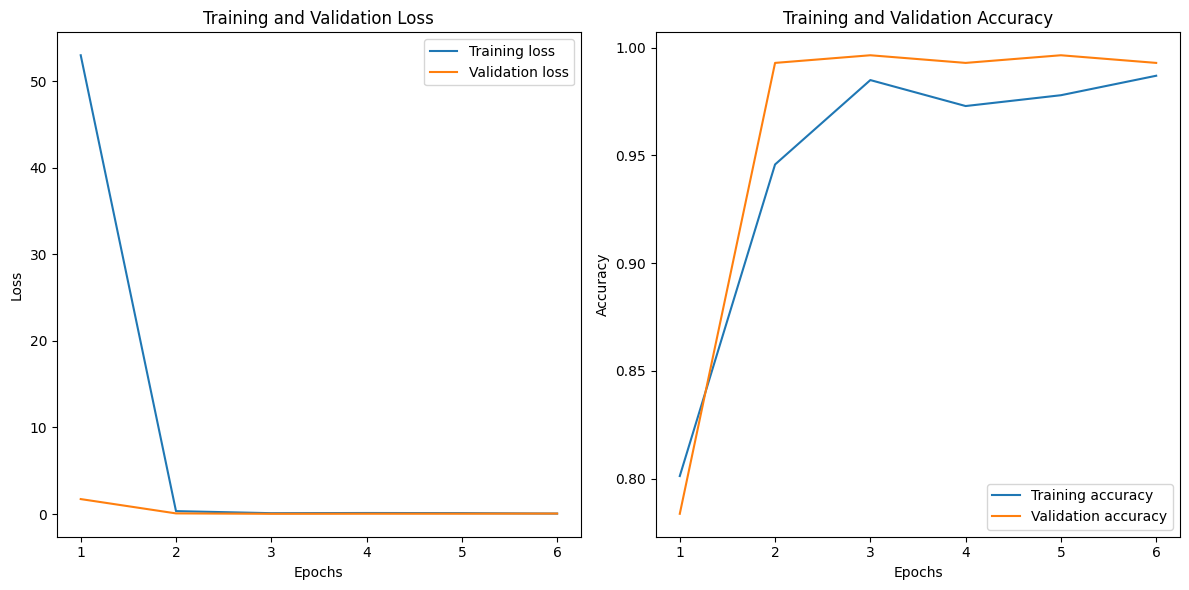

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


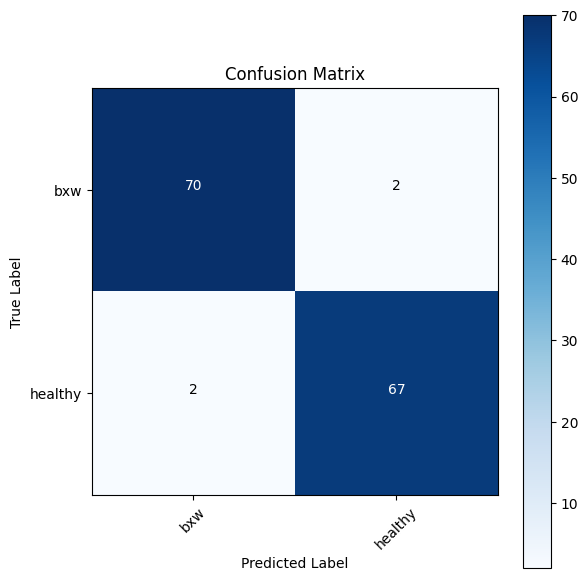

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
              precision    recall  f1-score   support

         bxw       0.97      0.97      0.97        72
     healthy       0.97      0.97      0.97        69

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [ ]:
# --- Model 2 definition ---

def model_2(input_shape, num_classes):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout layer added
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adam optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# --- Main Execution ---

# Create the model
model = model_2((128, 128, 3), len(le.classes_))

# 5. Training with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Define early stopping
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# Save the model
model.save("second_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("second_model.keras")

# ---  Evaluation and Plotting ---
_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



# Loading and Evaluation of the Pre-Trained Model


In [6]:
# Load the Pre-Trained Model
model_path = "models/second_model.keras"
loaded_model = load_model(model_path)

if loaded_model is None:
    print(f"Error loading model from {model_path}. Exiting.")
    exit()

loaded_model.summary() #Show the model summary

# Load and Preprocess Test Data
test_csv = '/content/data/test/_annotations.csv'
test_image_folder = '/content/data/test/images'

X_test, y_test, le = preprocess_and_encode(test_csv, test_image_folder)

if X_test is None or y_test is None:
    print("Error preprocessing test data. Exiting.")
    exit()

# Make Predictions
y_pred = make_predictions(loaded_model, X_test)

if y_pred is None:
    print("Error making predictions. Exiting.")
    exit()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,549,640 (74.58 MB)

 Trainable params: 6,516,546 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,033,094 (49.72 MB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step


Accuracy: 0.851063829787234
Loss: 0.6364160776138306
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        72
           1       0.77      1.00      0.87        69

    accuracy                           0.85       141
   macro avg       0.88      0.85      0.85       141
weighted avg       0.89      0.85      0.85       141



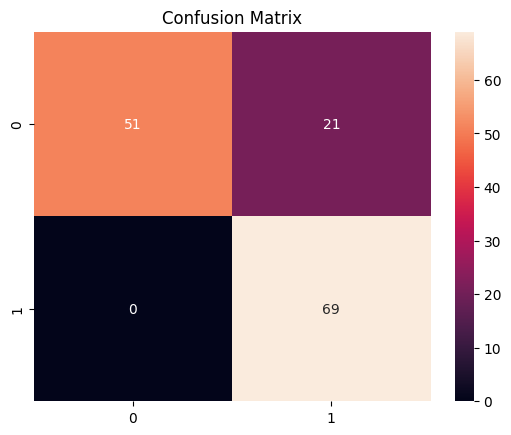

In [7]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Loss
loss = loaded_model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss[0])

# Clasification report to display precision, recall and f1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Visualizations: Insights based on my dataset

## Examples images with Class Labels
This visualization shows a few example images from each class, along with their predicted and actual labels. It helps us understand the types of images the model is classifying.

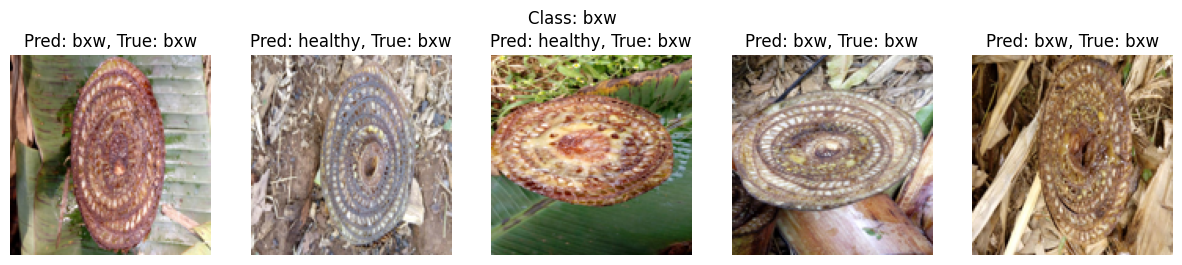

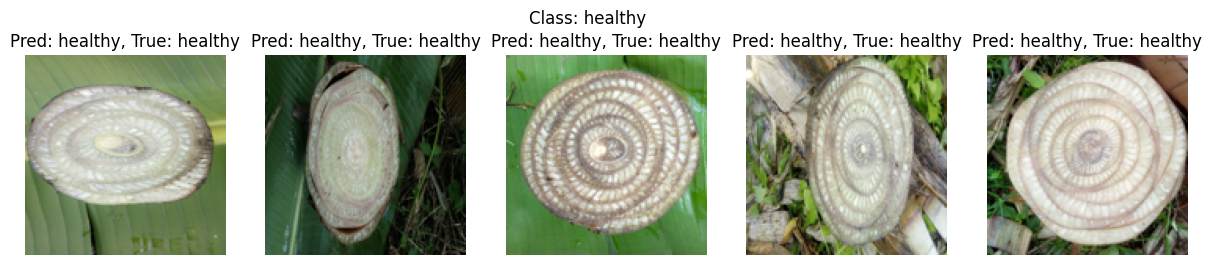

In [8]:
def display_images(images, labels_true, labels_pred, class_names, num_images=5):
    """Displays example images with labels."""
    for class_index in range(len(class_names)):
        class_images = images[labels_true == class_index]
        class_preds = labels_pred[labels_true == class_index]

        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Class: {class_names[class_index]}")

        for i in range(min(num_images, len(class_images))):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(class_images[i])
            plt.title(f"Pred: {class_names[class_preds[i]]}, True: {class_names[class_index]}")
            plt.axis("off")
        plt.show()

class_names = le.inverse_transform(np.unique(y_test))
display_images(X_test, y_test, y_pred, class_names)

## Pixel Value Distribution
This visualization gives insight into the overall brightness and color balance of the dataset

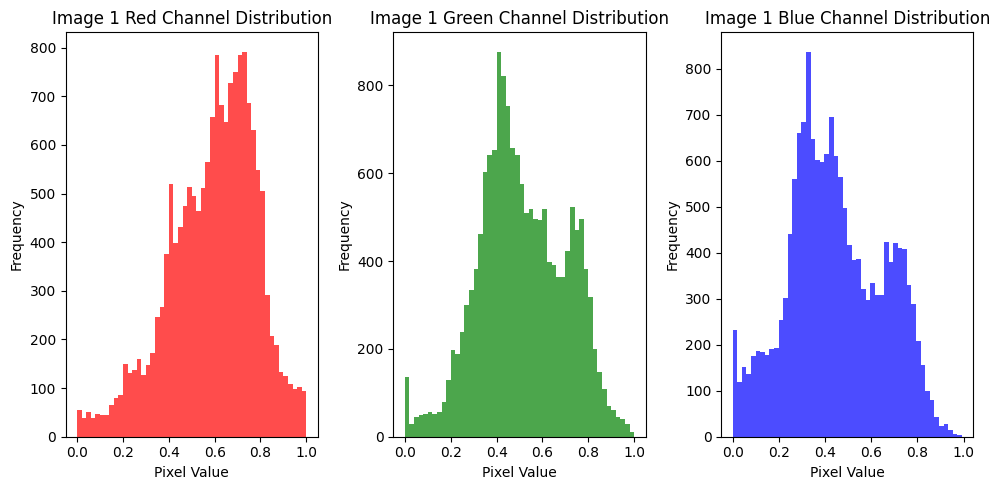

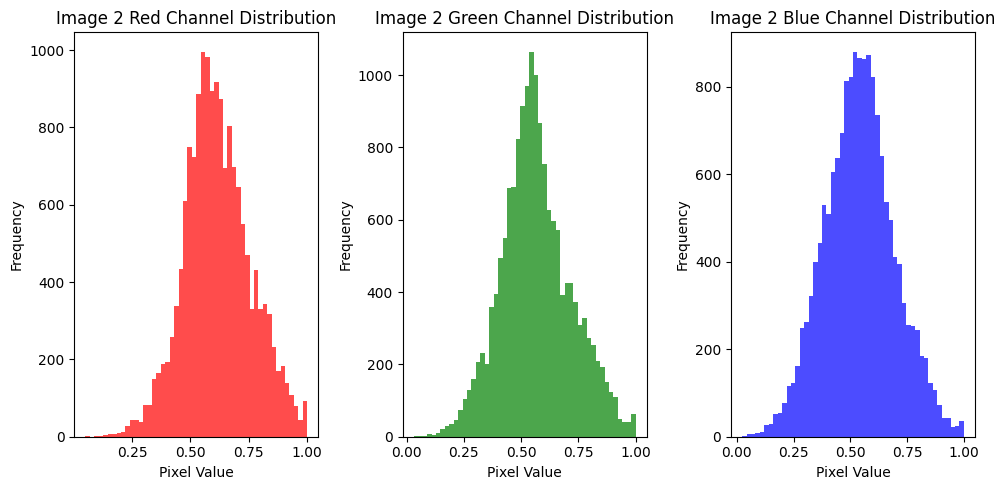

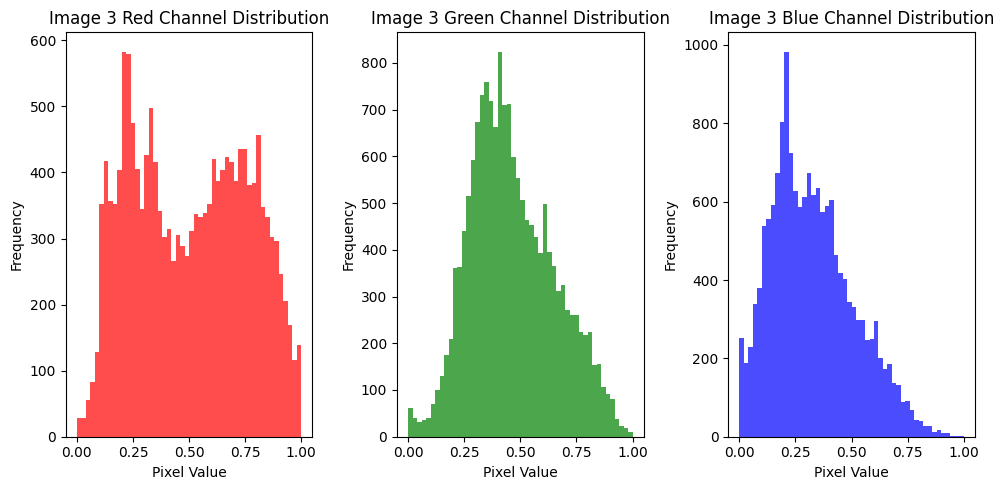

In [14]:
def plot_pixel_distribution(images, num_images=3):
    """Plots the pixel value distribution of a sample of images."""
    for i in range(min(num_images, len(images))):
        img = images[i]
        r_values = img[:, :, 0].flatten()
        g_values = img[:, :, 1].flatten()
        b_values = img[:, :, 2].flatten()

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.hist(r_values, bins=50, color='red', alpha=0.7)
        plt.title(f"Image {i+1} Red Channel Distribution")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 2)
        plt.hist(g_values, bins=50, color='green', alpha=0.7)
        plt.title(f"Image {i+1} Green Channel Distribution")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.hist(b_values, bins=50, color='blue', alpha=0.7)
        plt.title(f"Image {i+1} Blue Channel Distribution")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()

# As X_test contains the preprocessed images
plot_pixel_distribution(X_test)

## Image Size/Aspect Ratio Distribution
This visualization shows the distribution of image sizes or aspect ratios. It helps us understand if there's significant variability in image dimensions.

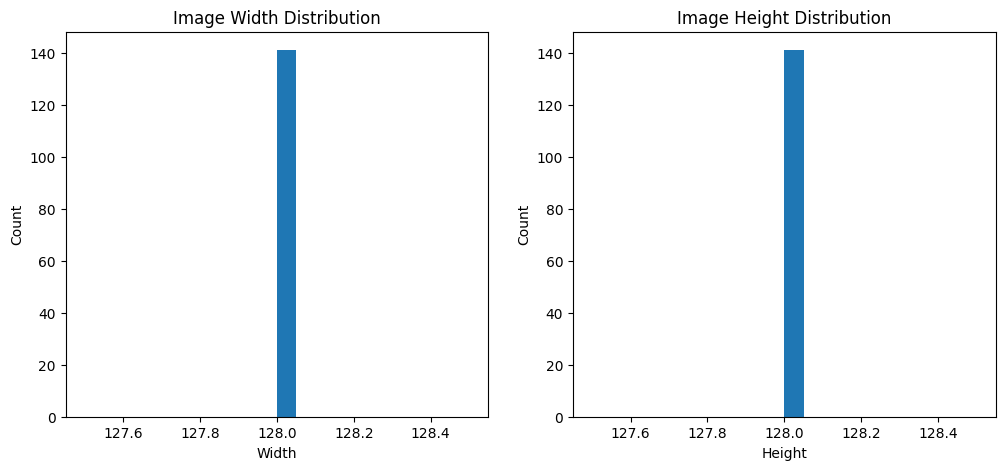

In [10]:
widths = []
heights = []

for image in X_test:
    height, width, _ = image.shape
    widths.append(width)
    heights.append(height)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.title("Image Width Distribution")
plt.xlabel("Width")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.title("Image Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")

plt.show()

## Class Distribution
This visualization shows how many images belong to each class. It helps us understand if the dataset is balanced or imbalanced.

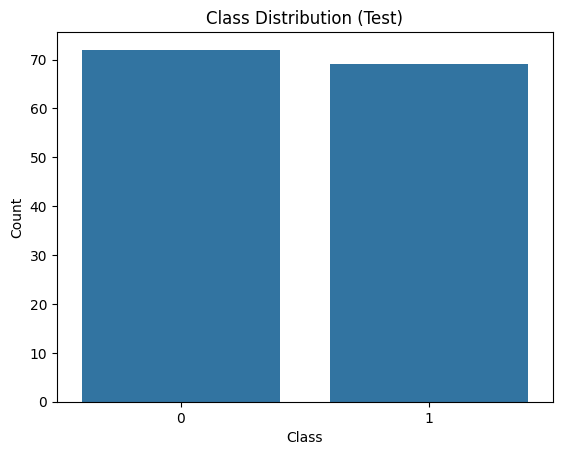

In [11]:
sns.countplot(x=y_test)
plt.title("Class Distribution (Test)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Image Brightness/Contrast Distribution

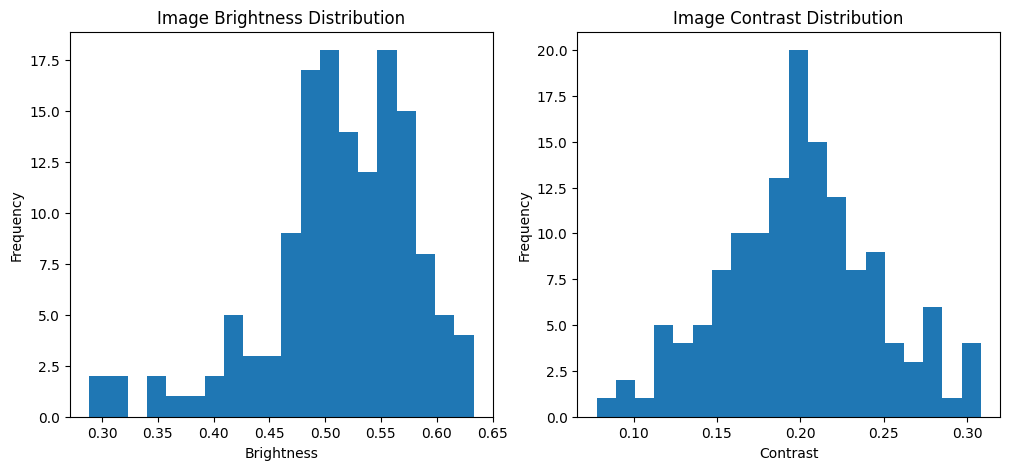

In [12]:
# Calculate image brightness
def calculate_brightness(image):
    """Calculates the average brightness of an image."""
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)  # Average across color channels
    return np.mean(image)

# Calculate image contrast
def calculate_contrast(image):
    """Calculates the contrast of an image using standard deviation."""
    # Convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)  # Average across color channels
    return np.std(image)


# Visualize contrast and brightness
def visualize_brightness_contrast(images):
    """Calculates and visualizes brightness and contrast."""
    brightness_values = [calculate_brightness(img) for img in images]
    contrast_values = [calculate_contrast(img) for img in images]

    plt.figure(figsize=(12, 5))

    # Brightness Histogram
    plt.subplot(1, 2, 1)
    plt.hist(brightness_values, bins=20)
    plt.title("Image Brightness Distribution")
    plt.xlabel("Brightness")
    plt.ylabel("Frequency")

    # Contrast Histogram
    plt.subplot(1, 2, 2)
    plt.hist(contrast_values, bins=20)
    plt.title("Image Contrast Distribution")
    plt.xlabel("Contrast")
    plt.ylabel("Frequency")

    plt.show()

visualize_brightness_contrast(X_test)